In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [31]:
# Carregando dados
ticker = "BBAS3.SA"
data = yf.Ticker(ticker).history(period="2y")

# Removendo colunas desnecessárias
del data["Dividends"]
del data["Stock Splits"]

# Limpeza de dados
data.dropna(inplace=True)

# Definindo X e y
X = data['Open'].values.reshape(-1, 1)
y = data['High'].values.reshape(-1, 1)


In [32]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# # Normalização dos dados
# x_scaler = StandardScaler()
# y_scaler = StandardScaler()

# X_train_scaled = x_scaler.fit_transform(X_train)
# X_test_scaled = x_scaler.transform(X_test)  # Atenção: usar apenas transform aqui
# y_train_scaled = y_scaler.fit_transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)


In [33]:
# Implementação da Floresta Aleatória
modelo_floresta = RandomForestRegressor(n_estimators=100, random_state=0)
modelo_floresta.fit(X_train, y_train)

c:\Users\55869\OneDrive\Área de Trabalho\TRABALHO_IA\chatbot-autismo\cuda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [34]:
# Previsões
y_pred = modelo_floresta.predict(X_test)
y_pred

array([16.53645108, 23.33148454, 22.63756286, 27.5193195 , 24.05494852,
       15.48410831, 28.58398583, 22.39037165, 19.15868045, 18.08965823,
       24.50805574, 23.9121018 , 22.81441845, 28.63358273, 17.85507025,
       22.51869358, 27.34121554, 28.26977576, 18.30151704, 18.05244196,
       19.86836895, 26.59146447, 23.85504977, 16.01575201, 18.09509942,
       28.54154139, 15.94006977, 27.47385654, 15.7153526 , 22.51869358,
       27.509476  , 15.71775803, 15.7153526 , 18.25722723, 26.3324868 ,
       26.2002796 , 22.69969243, 27.18074202, 22.5389578 , 23.53152222,
       23.45007302, 17.56273551, 26.96682789, 20.56434342, 19.1407928 ,
       14.50602283, 20.48538336, 23.70949828, 28.34656121, 15.7490011 ,
       26.50081168, 18.30151704, 22.51331082, 18.06970232, 15.86551731,
       15.26679155, 23.85504977, 17.75569047, 20.56434342, 22.26927484,
       17.8663627 , 26.572621  , 27.09234399, 27.66290879, 22.82481296,
       20.06168963, 15.08872599, 28.62611495, 22.4092057 , 19.42

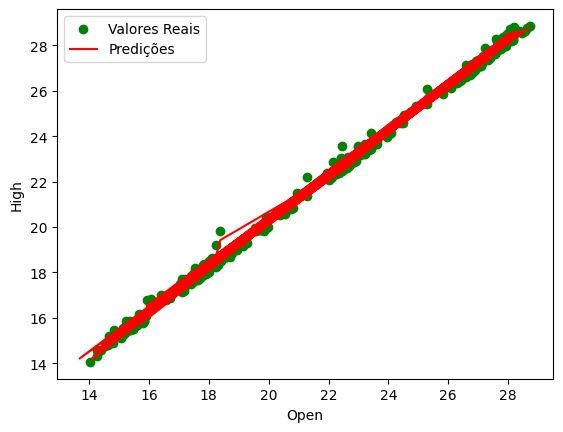

In [35]:
# Visualizando previsões
plt.scatter(X_train, y_train, color='green', label='Valores Reais')
plt.plot(X_test, y_pred, color='red', label='Predições')
plt.xlabel('Open')
plt.ylabel('High')
plt.legend()
plt.show()

In [36]:
# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [37]:
# Exibindo métricas
print(f"Coeficiente de Determinação (R2): {r2}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape}%")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")

Coeficiente de Determinação (R2): 0.9978053586292436
Erro Percentual Absoluto Médio (MAPE): 0.7521865759540022%
Erro Médio Absoluto (MAE): 0.15926693159776192
Erro Quadrático Médio (MSE): 0.04457317011230502


In [38]:
# Últimos valores conhecidos
last_known_high = data.iloc[-3]['Open'].reshape(1, -1) # Último valor de 'Open' para prever o próximo 'High'

predicted_prices_high = []

# Prever os próximos 7 dias
for _ in range(3):
    next_price_high = modelo_floresta.predict(last_known_high)
    
    predicted_prices_high.append(next_price_high[0])
    
    # Atualizar last_known_prices para a próxima previsão
    last_known_high = next_price_high.reshape(1, -1)

print('Predicted prices for the next 3 days:', predicted_prices_high)

Predicted prices for the next 3 days: [np.float64(26.778820788401035), np.float64(26.897870117391996), np.float64(26.93623012549389)]
